# Pedestrian-involved Crash Severity Prediction
## Contents
 •	Introduction 
 
 •	Exploratory Data Analysis
 
 •	Data Preprocessing
 
 •	CART Feature Importance
 
 •	Baseline Models
 
 •	Hyperparameter Tuning

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  make_scorer
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout 
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# 1. Introduction
## 1.1 Data
This research utilizes crash data covering incidents involving pedestrians in North Carolina spanning sixteen years, from 2007 to 2022 (NCDOT, 2024). While the dataset initially contained sixty-six features, only some were appropriate for analyzing pedestrian incidents. We only selected features relevant to pedestrian crashes. We applied domain expertise and feature selection techniques to streamline the features to identify those most relevant to pedestrian crashes. 

In [2]:
df = pd.read_csv(r"C:\Users\obasi\Desktop\NCPedCrashes_OnRoadway.csv",encoding='cp1252', low_memory=False)
df.head() 

,CrashID,CrashDate,AmbulanceR,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashLoc,...,Latitude,Longitude,Coordinates Source ID,GIS Route,GIS Milepost,Coded by PBCAT,Crash Report Link,MPORPO_Number,MPORPO_Name,Division
0,101891679,01/01/2007,Yes,None - Rural Crash,Cleveland,No,Monday,Crossing Expressway,6,Non-Intersection,...,35.20168,-81.3658,2.0,NaN,NaN,Y,https://crashweb.ncdot.gov/crashweb/submitCras...,8.0,Gaston-Cleveland-Lincoln MPO,12
1,101925014,01/01/2007,No,None - Rural Crash,Davidson,No,Monday,Walking Along Roadway,20,Non-Intersection,...,35.97080,-80.2337,2.0,NaN,NaN,Y,https://crashweb.ncdot.gov/crashweb/submitCras...,19.0,Winston Salem Urban Area MPO,9
2,101925695,01/01/2007,Yes,None - Rural Crash,Pender,Yes,Monday,Walking Along Roadway,1,Non-Intersection,...,34.44278,-77.6057,2.0,NaN,NaN,Y,https://crashweb.ncdot.gov/crashweb/submitCras...,21.0,Cape Fear RPO,3
3,101925802,01/01/2007,Yes,Raleigh,Wake,No,Monday,Crossing Driveway or Alley,20,Non-Intersection,...,35.83608,-78.5815,2.0,NaN,NaN,Y,https://crashweb.ncdot.gov/crashweb/submitCras...,3.0,Capital Area MPO,5
4,101925868,01/01/2007,Yes,Charlotte,Mecklenburg,Yes,Monday,Unusual Circumstances,1,Intersection-Related,...,35.25279,-80.8204,2.0,NaN,NaN,Y,https://crashweb.ncdot.gov/crashweb/submitCras...,4.0,Charlotte Regional Transportation Planning Org...,10


## 1.2 Project Objectives
The dataset comprises detailed information on 33,583 accidents, with 65 predictor variables and a target variable, CrashSevr (Crash Severity). CrashSevr can take on one of six possible values: Suspected Minor Injury, Possible Injury, Suspected Serious Injury, Killed, No Injury, and Unknown Injury. The project's goal is to develop predictive models to classify the severity of an crash—whether it falls into one of these six categories—based on the 65 relevant predictor variables associated with each accident.

## 1.3 Evaluation Metric
This study employs precision, F1-score, and recall as evaluation metrics, offering a more comprehensive evaluation of model performance. These metrics are defined as follows:

Precision = (TP/(TP+FP))
Recall = (TP/(TP+FN))  
F-score = ((2x(Precision x Recall))/((Precision+Recall)))

False Positives (FP) occur when the model incorrectly identifies an instance as belonging to the positive class. True Positives (TP) refer to instances where the model accurately predicts the positive class. On the other hand, False Negatives (FN) happen when the model fails to identify an instance that belongs to the positive class, mistakenly classifying it as negative. Consequently, in cases where the model performs well on the majority class but poorly on the minority class, the precision and recall values for the minority class are expected to be lower than those for the majority class. The F1 score is a valuable metric that combines precision and recall into a single value using their weighted average, providing a balanced measure of model performance.

## Exploratory Data Analysis

### 2.1 Basic Data Exploration

In [3]:
print("Shape of the Data: {} ". format(df.shape))

Shape of the Data: (33583, 66) 


In [4]:
df.columns

Index(['CrashID', 'CrashDate', 'AmbulanceR', 'City', 'County', 'CrashAlcoh',
       'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc', 'CrashMonth',
       'CrashSevr', 'CrashType', 'CrashYear', 'Developmen', 'DrvrAge',
       'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace',
       'DrvrSex', 'DrvrVehTyp', 'HitRun', 'LightCond', 'Locality', 'NumLanes',
       'NumPedsAin', 'NumPedsBin', 'NumPedsCin', 'NumPedsKil', 'NumPedsNoi',
       'NumPedsTot', 'NumPedsUin', 'NumUnits', 'PedAge', 'PedAgeGrp',
       'PedAlcDrg', 'PedAlcFlag', 'PedInjury', 'PedPos', 'PedRace', 'PedSex',
       'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdDefects',
       'RdFeature', 'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit',
       'TraffCntrl', 'Weather', 'Workzone', 'Latitude', 'Longitude',
       'Coordinates Source ID', 'GIS Route', 'GIS Milepost', 'Coded by PBCAT',
       'Crash Report Link', 'MPORPO_Number', 'MPORPO_Name', 'Division'],
      dtype='object')

In [5]:
df.dtypes

CrashID                int64
CrashDate             object
AmbulanceR            object
City                  object
County                object
                      ...   
Coded by PBCAT        object
Crash Report Link     object
MPORPO_Number        float64
MPORPO_Name           object
Division              object
Length: 66, dtype: object

In [6]:
print("Number of integer columns: {} ". format(df.dtypes.tolist().count(df.dtypes[0])))
print("Number of object columns: {} ". format(df.dtypes.tolist().count(df.dtypes[20])))

Number of integer columns: 3 
Number of object columns: 59 


In [7]:
duplicate = df[df.duplicated()== True]
print("Number of duplicate rows: {} ".format(len(duplicate)))

Number of duplicate rows: 0 


In [8]:
df.isna().sum()

CrashID               0
CrashDate             0
AmbulanceR            0
City                  0
County                0
                     ..
Coded by PBCAT        0
Crash Report Link     0
MPORPO_Number        14
MPORPO_Name          14
Division              0
Length: 66, dtype: int64

In [9]:
print("Total number of missing values: {}".format(df.isna().sum().sum()))
print("Number of columns with missing values: {}".format(len([col for col in df.columns if df[col].isnull().sum() > 0])))
print("Number of columns without missing values: {}".format(len([col for col in df.columns if df[col].isnull().sum() == 0])))

Total number of missing values: 53077
Number of columns with missing values: 8
Number of columns without missing values: 58


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33583 entries, 0 to 33582
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrashID                33583 non-null  int64  
 1   CrashDate              33583 non-null  object 
 2   AmbulanceR             33583 non-null  object 
 3   City                   33583 non-null  object 
 4   County                 33583 non-null  object 
 5   CrashAlcoh             33583 non-null  object 
 6   CrashDay               33583 non-null  object 
 7   CrashGrp               33583 non-null  object 
 8   CrashHour              33583 non-null  int64  
 9   CrashLoc               33583 non-null  object 
 10  CrashMonth             33583 non-null  object 
 11  CrashSevr              33583 non-null  object 
 12  CrashType              33583 non-null  object 
 13  CrashYear              33583 non-null  int64  
 14  Developmen             33583 non-null  object 
 15  Dr

In [11]:
print("Number of duplicate observations: {}".format(df.duplicated().sum()))

Number of duplicate observations: 0


In [12]:
df.describe()

,CrashID,CrashHour,CrashYear,Latitude,Longitude,Coordinates Source ID,MPORPO_Number
count,3.358300e+04,33583.000000,33583.000000,33202.000000,33202.000000,33226.000000,33569.000000
mean,1.045006e+08,14.388024,2014.780603,35.516202,-79.644864,3.783844,12.073818
std,1.504887e+06,6.234147,4.515952,0.508523,1.442890,5.977761,10.138279
min,1.018842e+08,0.000000,2007.000000,33.884050,-84.304098,0.000000,0.000000
25%,1.032332e+08,10.000000,2011.000000,35.213033,-80.808394,2.000000,4.000000
50%,1.044474e+08,16.000000,2015.000000,35.578590,-79.756914,2.000000,7.000000
75%,1.057680e+08,19.000000,2019.000000,35.926211,-78.639091,2.000000,19.000000
max,1.073453e+08,23.000000,2022.000000,36.566592,-75.465317,25.000000,37.000000


In [13]:
df.describe(include = "all").head(4).T

,count,unique,top,freq
CrashID,33583.0,NaN,NaN,NaN
CrashDate,33583,5793,10/31/2008,21
AmbulanceR,33583,3,Yes,24028
City,33583,472,None - Rural Crash,7328
County,33583,100,Mecklenburg,5790
...,...,...,...,...
Coded by PBCAT,33583,2,Y,32256
Crash Report Link,33583,33583,https://crashweb.ncdot.gov/crashweb/submitCras...,1
MPORPO_Number,33569.0,NaN,NaN,NaN
MPORPO_Name,33569,39,Charlotte Regional Transportation Planning Org...,6543


## 2.2. Data Visualization
### The target variable: Crash severity
The ***CrashSevr*** is a categorical variable with six possible values.

In [14]:
df['CrashSevr'].unique()

array(['A: Suspected Serious Injury', 'B: Suspected Minor Injury',
       'C: Possible Injury', 'O: No Injury', 'Unknown Injury',
       'K: Killed'], dtype=object)

In [15]:
df['CrashSevr'].value_counts()

B: Suspected Minor Injury      12684
C: Possible Injury             11454
A: Suspected Serious Injury     3398
K: Killed                       3139
O: No Injury                    2606
Unknown Injury                   302
Name: CrashSevr, dtype: int64

In [16]:
# Add annotations function
def add_annotations(ax):
    for p in ax.patches:
        frequency = int(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(f'{frequency}', (x, y), size=12, ha='center', va='bottom')

# Visualization function
def count_donut(data, col):
    plt.figure(figsize=(14, 7))

    # Countplot
    ax1 = plt.subplot(1, 2, 1)
    count = sns.countplot(x=data[col])
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.despine(top=True, right=True)
    add_annotations(ax1)

    # Donutplot
    ax2 = plt.subplot(1, 2, 2)
    
    # Get value counts and corresponding labels
    value_counts = data[col].value_counts()
    labels = value_counts.index.tolist()
    sizes = value_counts.values
    
    plt.pie(sizes,
            labels=labels,
            autopct='%1.2f%%',
            pctdistance=0.8,
            shadow=False,
            radius=1.3,
            textprops={'fontsize': 14}
            )
    circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    ax2.set_xlabel('')

    plt.suptitle(f"Frequency Comparison of {col}", fontsize=16)
    plt.subplots_adjust(wspace=0.4)
    plt.show()

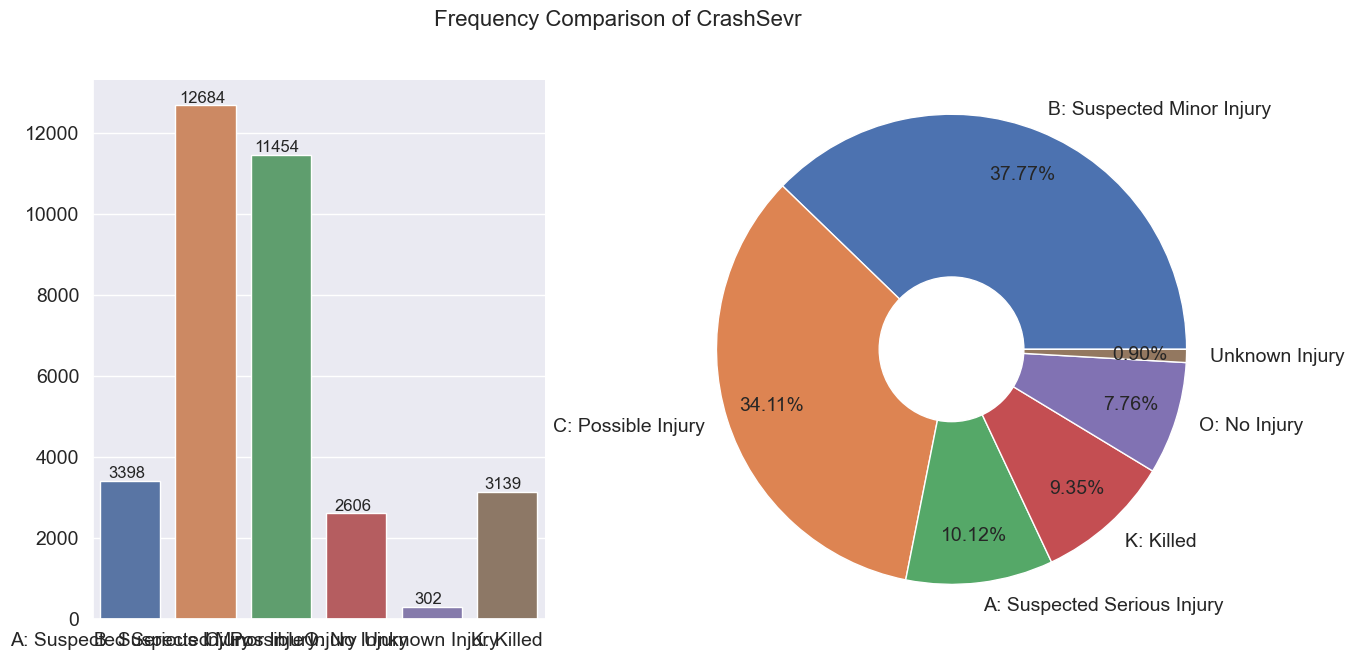

In [17]:
count_donut(df, 'CrashSevr')

**The charts indicate that the data concerning the target variable (CrashSevr) is imbalanced**. Most accidents fall into the suspected minor injury category, accounting for 37.77% of the instances. This is followed by the possible injury category at 34.11% and suspected serious injury at 10.12%. The killed and no-injury categories represent 9.35% and 7.76% of the data, respectively. Accidents with unknown injury make up only 0.90% of the dataset. Next, we will explore the various feature variables to understand how the target variable behaves in relation to changes in these features.

## 3. Data Preprocessing
### 3.1. Outlier Detection
There are three numerical variables in the dataset: CrashID, CrashHour, and CrashYear

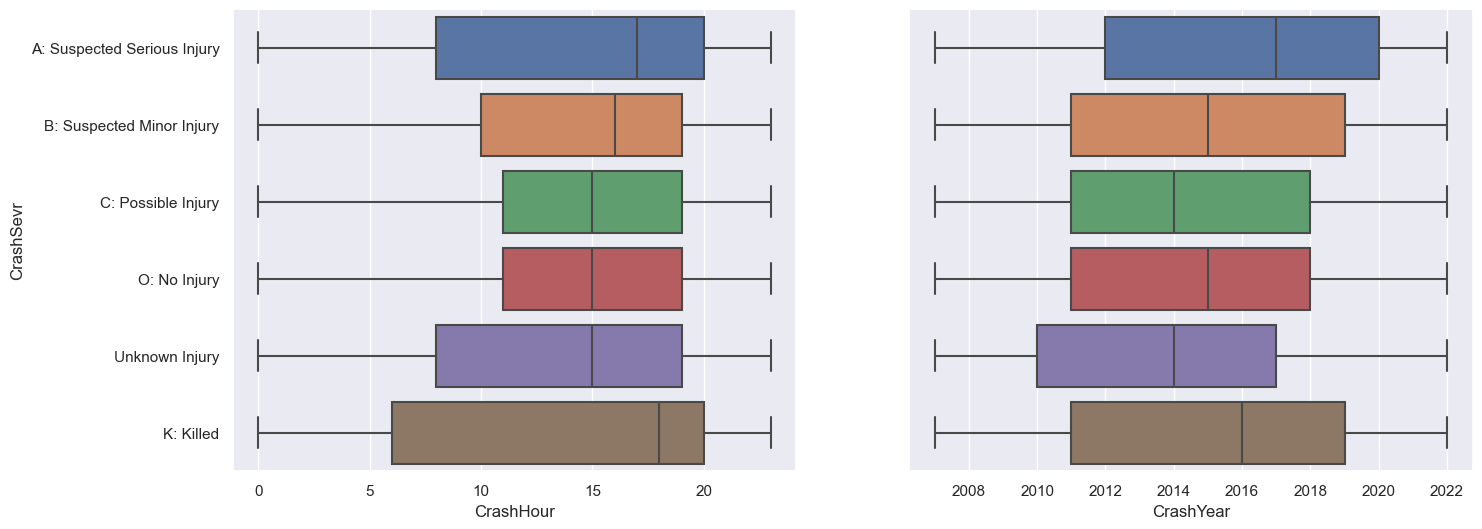

In [18]:
# Boxplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
sns.boxplot(data = df, x = 'CrashHour', y = 'CrashSevr', ax = ax1)
sns.boxplot(data = df, x = 'CrashYear', y = 'CrashSevr', ax = ax2).set(yticklabels = [])
ax2.set_ylabel('')
plt.show()

### 3.2 Missing Data Imputation

In [19]:
# function to handle 'Not coded' values
def handle_not_coded(df, column):
    
    # To check if unknown values exist
    if 'Unknown' in df[column].values:
        
        df[column] = df[column].replace('Not coded', 'Unknown')
        df[column] = df[column].replace('Not Coded', 'Unknown')
        df[column] = df[column].replace('Unknown/Missing', 'Unknown')
        df[column] = df[column].replace('Unknown Injury', 'Unknown')
    else:
       
        df[column] = df[column].replace('Not coded', 'Unknown')
        df[column] = df[column].replace('Not Coded', 'Unknown')

    return df


columns_to_clean = ['AmbulanceR', 'City', 'County', 'CrashAlcoh', 'CrashDay', 'CrashGrp', 'CrashHour', 'CrashLoc',
    'CrashMonth', 'CrashSevr', 'CrashType', 'CrashYear', 'Developmen', 'DrvrAge', 'DrvrAgeGrp',
    'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex', 'DrvrVehTyp', 'HitRun',
    'LightCond', 'Locality', 'NumLanes', 'NumPedsAin', 'NumPedsBin', 'NumPedsCin', 'NumPedsKil',
    'NumPedsNoi', 'NumPedsTot', 'NumPedsUin', 'NumUnits', 'PedAge', 'PedAgeGrp', 'PedAlcDrg',
    'PedAlcFlag', 'PedInjury', 'PedPos', 'PedRace', 'PedSex', 'RdCharacte', 'RdClass', 'RdConditio',
    'RdConfig', 'RdDefects', 'RdFeature', 'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit',
    'TraffCntrl', 'Weather', 'Workzone']


for column in columns_to_clean:
    df = handle_not_coded(df, column)

# Print the updated counts and percentages
for column in columns_to_clean:
    category_counts = df[column].value_counts()
    category_percentages = df[column].value_counts(normalize=True) * 100
    category_stats = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
    print(f"Count and Percentage of categories in '{column}':")
    print(category_stats)
    print("\n")

C:\Users\obasi\AppData\Local\Temp\ipykernel_6356\988607880.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Unknown' in df[column].values:


Count and Percentage of categories in 'AmbulanceR':
         Count  Percentage
Yes      24028   71.548105
No        8228   24.500491
Unknown   1327    3.951404


Count and Percentage of categories in 'City':
                    Count  Percentage
None - Rural Crash   7328   21.820564
Charlotte            5402   16.085519
Raleigh              2617    7.792633
Greensboro           1826    5.437275
Durham               1612    4.800048
...                   ...         ...
Faith                   1    0.002978
Stonewall               1    0.002978
Boonville               1    0.002978
Vienna                  1    0.002978
Mcadenville             1    0.002978

[472 rows x 2 columns]


Count and Percentage of categories in 'County':
             Count  Percentage
Mecklenburg   5790   17.240866
Wake          3560   10.600601
Guilford      2448    7.289402
Durham        1691    5.035286
Cumberland    1552    4.621386
...            ...         ...
Mitchell        12    0.035732
Graham        

Count and Percentage of categories in 'RdFeature':
                                    Count  Percentage
No Special Feature                  21910   65.241342
Four-Way Intersection                3577   10.651222
T-Intersection                       2127    6.333562
Unknown                              1714    5.103773
Missing                              1293    3.850162
Driveway, Public                      722    2.149897
Driveway, Private                     627    1.867016
Related To Intersection               534    1.590090
On or Off Ramp                        269    0.801001
Bridge                                215    0.640205
Other                                 148    0.440699
Underpass                              76    0.226305
Y-Intersection                         75    0.223327
Bridge Approach                        54    0.160796
Non-Intersection Median Crossing       34    0.101242
Traffic Circle/Roundabout              32    0.095286
Alley Intersection             

In [20]:
# To reduce data noise, let us drop variables with categories > 15

# List of variables to drop
variables_to_drop = [
    'CrashDate', 'County', 'City', 'CrashType', 'DrvrAge', 'DrvrVehTyp', 'PedAge','RdFeature', 'CrashID',
     'RdFeature', 'GIS Route', 'NumPedsBin', 'NumPedsUin', 'NumPedsKil', 'NumPedsCin', 'NumPedsAin', 'NumPedsTot', 'NumPedsNoi', 'NumUnits', 'GIS Milepost', 'MPORPO_Number', 'Longitude', 'Latitude', 'Coordinates Source ID', 'Crash Report Link', 
    'Coded by PBCAT', 'CrashYear', 'CrashHour', 'CrashMonth', 'MPORPO_Name', 'Division'
]

df = df.drop(columns=variables_to_drop)

In [21]:
#Check and count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)

#Calculate percentage of null value
missing_percentage=missing_number/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(20)

,missing number,missing percentage
AmbulanceR,0,0.0
CrashAlcoh,0,0.0
PedInjury,0,0.0
PedPos,0,0.0
PedRace,0,0.0
PedSex,0,0.0
RdCharacte,0,0.0
RdClass,0,0.0
RdConditio,0,0.0
RdConfig,0,0.0


### 3.3 Categorical Data Encoding
We employed Label encoding to convert categorical variables into numerical values. The standard-scaler method was employed for feature scaling in this study. The Standard-scaler transforms numeric features to yield a distribution with a mean value of 0 and a standard deviation of 1.

In [22]:
#Get list of categorical variables
s=(df.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables in the dataset:",object_cols)

#Label Encoding the categorical varibles
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
print("All Features are now numerical")

# Standard Scaling
scaler=StandardScaler()
scaler.fit(df)
scaled_ds=pd.DataFrame(scaler.transform(df),columns=df.columns)
print("All features are now scaled")

Categorical variables in the dataset: ['AmbulanceR', 'CrashAlcoh', 'CrashDay', 'CrashGrp', 'CrashLoc', 'CrashSevr', 'Developmen', 'DrvrAgeGrp', 'DrvrAlcDrg', 'DrvrAlcFlg', 'DrvrInjury', 'DrvrRace', 'DrvrSex', 'HitRun', 'LightCond', 'Locality', 'NumLanes', 'PedAgeGrp', 'PedAlcDrg', 'PedAlcFlag', 'PedInjury', 'PedPos', 'PedRace', 'PedSex', 'RdCharacte', 'RdClass', 'RdConditio', 'RdConfig', 'RdDefects', 'RdSurface', 'Region', 'RuralUrban', 'SpeedLimit', 'TraffCntrl', 'Weather', 'Workzone']
All Features are now numerical
All features are now scaled


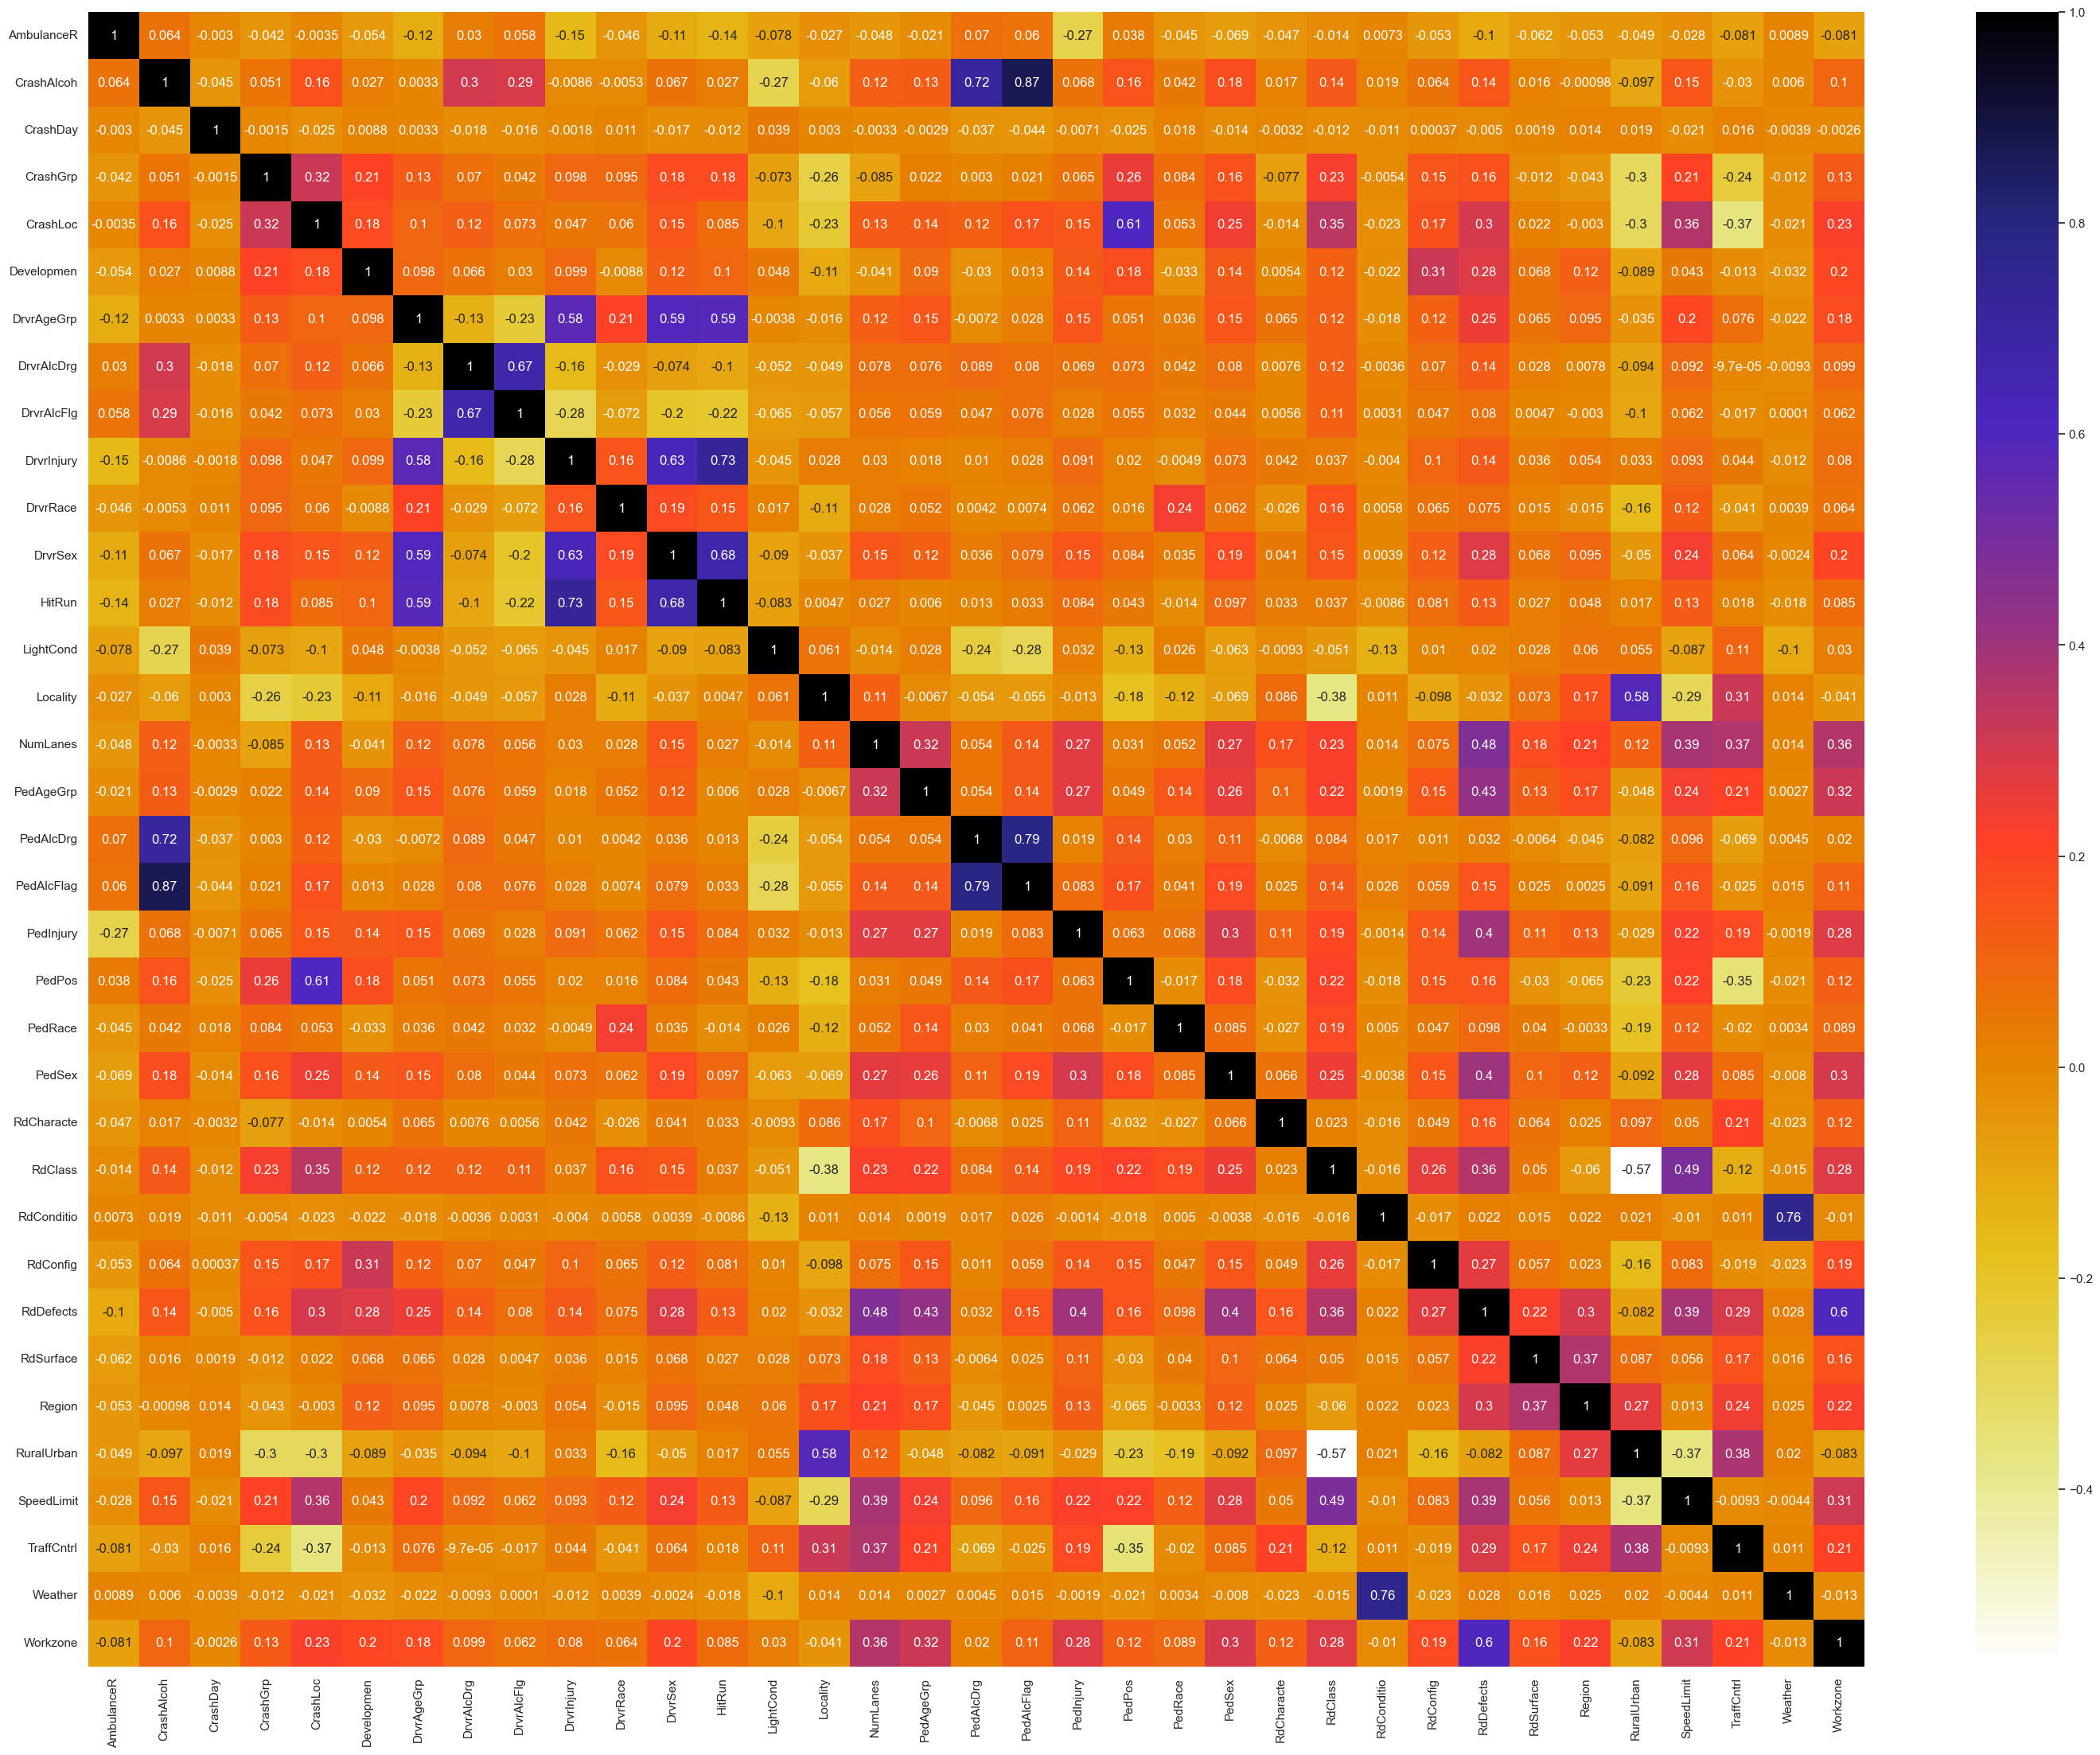

In [23]:
def heatmap(df):
    plt.figure(figsize = (36, 27))
    sns.heatmap(df.corr(), annot = True, cmap = plt.cm.CMRmap_r)
    
df_heat = df.drop('CrashSevr', axis = 1)
heatmap(df_heat)

### 3.4 Feature Importance Selection 
This study utilized the CART model to identify key variables before predicting crash severity. Feature selection was conducted for three distinct target variables: 'PedInjury,' 'CrashSevr,' and 'DrvrInjury.' While this study focuses on crash severity, the other two variables are also significant. The x-axis represents the importance of each variable using z-scores, and the y-axis lists the corresponding variables. The importance rankings indicate the relative contribution of each feature within the CART model.

Most significant features for Pedestrian Injury based on CART:
       Feature  Importance
5   Developmen    0.094368
15   PedAgeGrp    0.078943
2     CrashDay    0.075448
6   DrvrAgeGrp    0.072418
3     CrashGrp    0.052922
14    NumLanes    0.048385
20      PedSex    0.036098
30  TraffCntrl    0.035691
9     DrvrRace    0.035014
29  SpeedLimit    0.034542
12   LightCond    0.032258
21  RdCharacte    0.031435
19     PedRace    0.031131
22     RdClass    0.030422
27      Region    0.028368
24    RdConfig    0.027865
26   RdSurface    0.026460
18      PedPos    0.024271
7   DrvrAlcDrg    0.022400
10     DrvrSex    0.022138
13    Locality    0.021403
31     Weather    0.021131
4     CrashLoc    0.020010
0   AmbulanceR    0.016811
16   PedAlcDrg    0.015809
23  RdConditio    0.012595
17  PedAlcFlag    0.012041
28  RuralUrban    0.010804
8   DrvrAlcFlg    0.010652
11      HitRun    0.008723
25   RdDefects    0.004287
32    Workzone    0.003058
1   CrashAlcoh    0.002101
Most significant fe

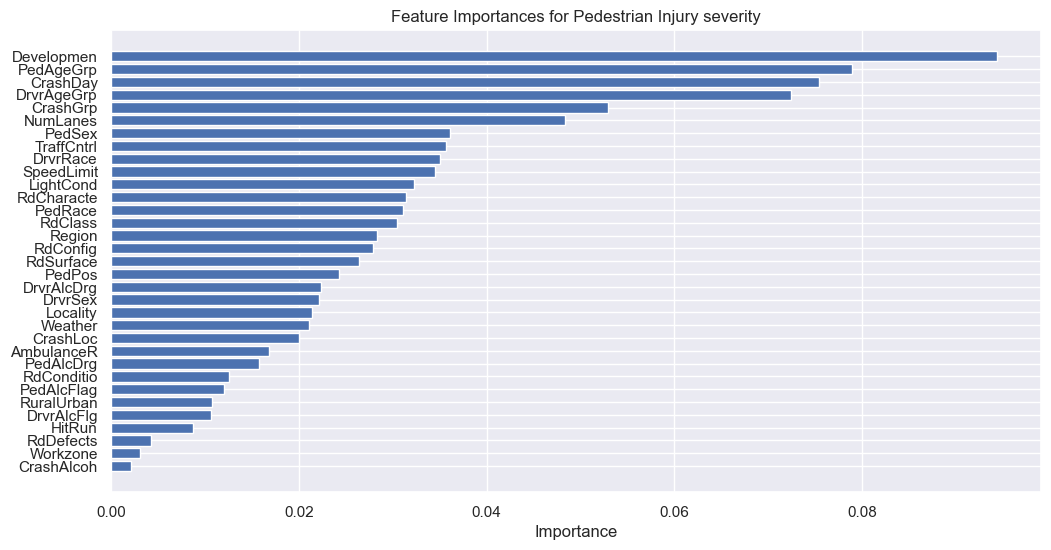

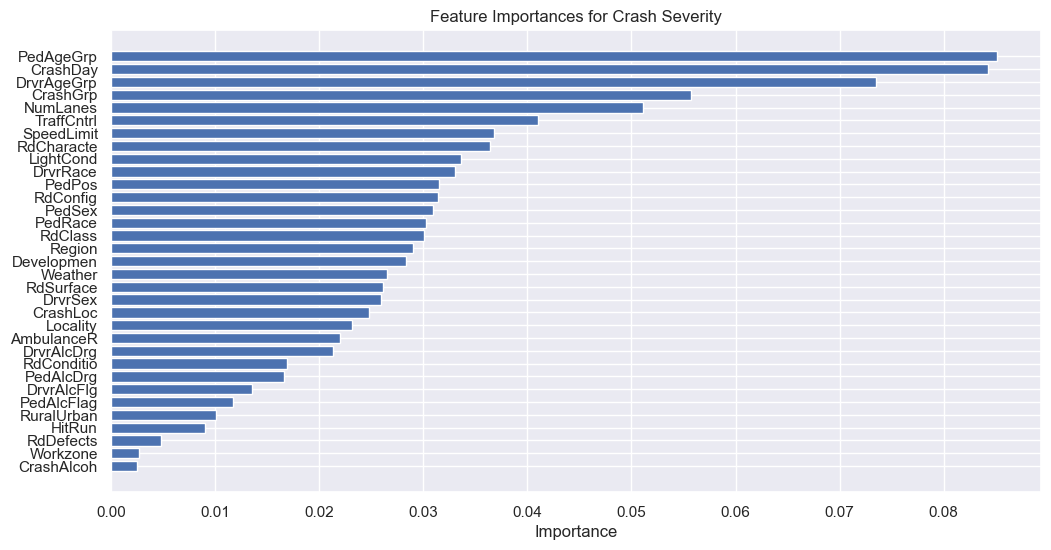

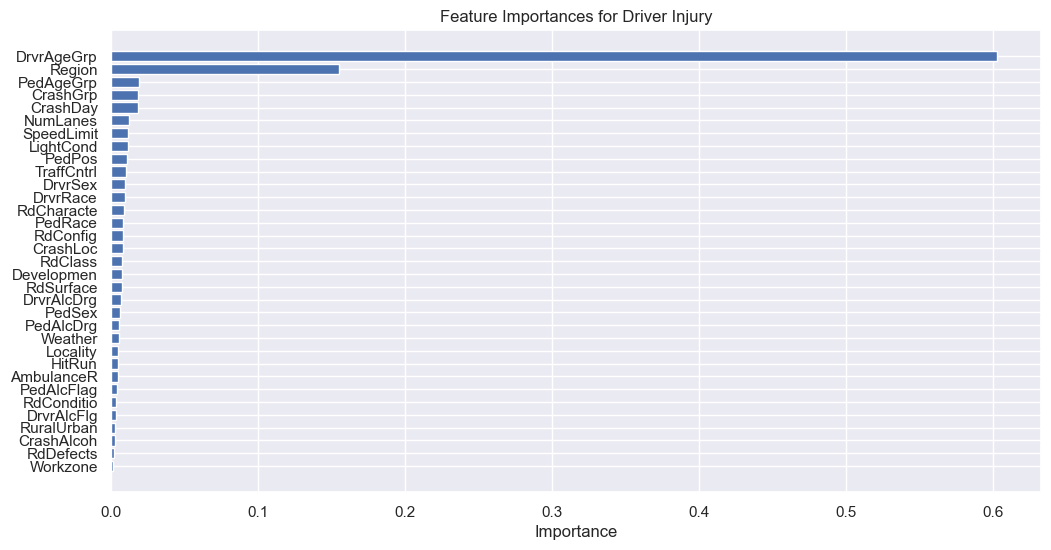

In [24]:
#Let us use CART algorithm for feature selection before prediction 
#We shall check 3 target variables 


target_ped_injury = 'PedInjury'
target_crash_sevr = 'CrashSevr'
target_drvr_injury = 'DrvrInjury'


label_encoder_ped_injury = LabelEncoder()
df[target_ped_injury] = label_encoder_ped_injury.fit_transform(df[target_ped_injury])

label_encoder_crash_sevr = LabelEncoder()
df[target_crash_sevr] = label_encoder_crash_sevr.fit_transform(df[target_crash_sevr])

label_encoder_drvr_injury = LabelEncoder()
df[target_drvr_injury] = label_encoder_drvr_injury.fit_transform(df[target_drvr_injury])


y_ped_injury = df[target_ped_injury]
X_ped_injury = df.drop([target_ped_injury, target_crash_sevr, target_drvr_injury], axis=1)


y_crash_sevr = df[target_crash_sevr]
X_crash_sevr = df.drop([target_ped_injury, target_crash_sevr, target_drvr_injury], axis=1)


y_drvr_injury = df[target_drvr_injury]
X_drvr_injury = df.drop([target_ped_injury, target_crash_sevr, target_drvr_injury], axis=1)

# Let us Handle non-numeric columns
for column in X_ped_injury.columns:
    if X_ped_injury[column].dtype == 'object':
        X_ped_injury[column] = LabelEncoder().fit_transform(X_ped_injury[column])

for column in X_crash_sevr.columns:
    if X_crash_sevr[column].dtype == 'object':
        X_crash_sevr[column] = LabelEncoder().fit_transform(X_crash_sevr[column])

for column in X_drvr_injury.columns:
    if X_drvr_injury[column].dtype == 'object':
        X_drvr_injury[column] = LabelEncoder().fit_transform(X_drvr_injury[column])

# Fit a Decision Tree Classifier (CART) to select important features for Pedestrian Injury
tree_ped_injury = DecisionTreeClassifier(random_state=42)
tree_ped_injury.fit(X_ped_injury, y_ped_injury)


importances_ped_injury = tree_ped_injury.feature_importances_
feature_names_ped_injury = X_ped_injury.columns


feature_importances_ped_injury = pd.DataFrame({'Feature': feature_names_ped_injury, 'Importance': importances_ped_injury})
feature_importances_ped_injury = feature_importances_ped_injury.sort_values(by='Importance', ascending=False)


print("Most significant features for Pedestrian Injury based on CART:")
print(feature_importances_ped_injury)

#Now let us do the same with Crash Severity


tree_crash_sevr = DecisionTreeClassifier(random_state=42)
tree_crash_sevr.fit(X_crash_sevr, y_crash_sevr)


importances_crash_sevr = tree_crash_sevr.feature_importances_
feature_names_crash_sevr = X_crash_sevr.columns


feature_importances_crash_sevr = pd.DataFrame({'Feature': feature_names_crash_sevr, 'Importance': importances_crash_sevr})
feature_importances_crash_sevr = feature_importances_crash_sevr.sort_values(by='Importance', ascending=False)


print("Most significant features for Crash Severity based on CART:")
print(feature_importances_crash_sevr)

# Let us select important features for Driver Injury
tree_drvr_injury = DecisionTreeClassifier(random_state=42)
tree_drvr_injury.fit(X_drvr_injury, y_drvr_injury)


importances_drvr_injury = tree_drvr_injury.feature_importances_
feature_names_drvr_injury = X_drvr_injury.columns


feature_importances_drvr_injury = pd.DataFrame({'Feature': feature_names_drvr_injury, 'Importance': importances_drvr_injury})
feature_importances_drvr_injury = feature_importances_drvr_injury.sort_values(by='Importance', ascending=False)


print("Most significant features for Driver Injury based on CART:")
print(feature_importances_drvr_injury)


plt.figure(figsize=(12, 6))
plt.barh(feature_importances_ped_injury['Feature'], feature_importances_ped_injury['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Pedestrian Injury severity')
plt.gca().invert_yaxis()
plt.show()


plt.figure(figsize=(12, 6))
plt.barh(feature_importances_crash_sevr['Feature'], feature_importances_crash_sevr['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Crash Severity')
plt.gca().invert_yaxis()
plt.show()


plt.figure(figsize=(12, 6))
plt.barh(feature_importances_drvr_injury['Feature'], feature_importances_drvr_injury['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Driver Injury')
plt.gca().invert_yaxis()
plt.show()


## 4. Baseline Models
First, we established the predictor-target split. The dataset was then divided into two parts, with 80% allocated for training and validation and the remaining 20% reserved for testing the final model's performance. To address class imbalance, we applied the SMOTE resampling technique. Baseline models, including DNN, RF, KNN, DT, NB, and LR, were developed. We then used grid search to identify the optimal hyperparameters for the baseline models to achieve the highest accuracy. 

C:\Users\obasi\AppData\Local\Temp\ipykernel_6356\973147069.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'KerasNN': KerasClassifier(build_fn=build_keras_model, epochs=50, batch_size=256, verbose=0)


Performing grid search for RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0     0.9797    0.9520    0.9656       708
           1     0.9894    0.9717    0.9805      2509
           2     0.9712    0.9544    0.9627      2260
           3     0.9604    0.9281    0.9440       654
           4     0.7797    0.9283    0.8475       530
           5     0.6667    0.9643    0.7883        56

    accuracy                         0.9561      6717
   macro avg     0.8912    0.9498    0.9148      6717
weighted avg     0.9602    0.9561    0.9573      6717



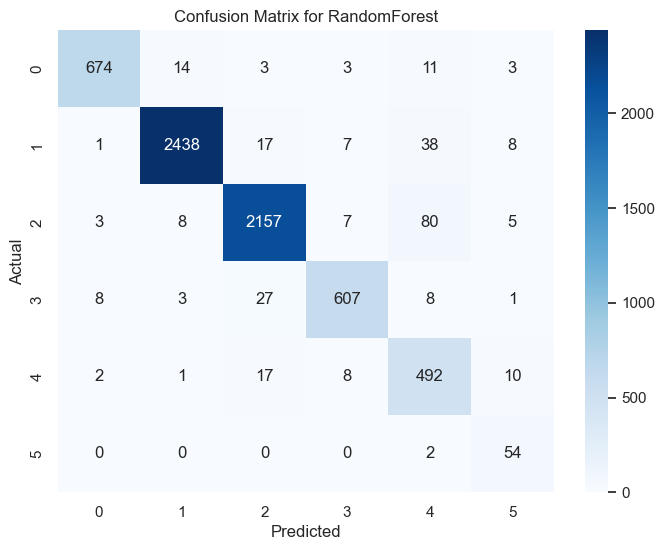

Performing grid search for KNN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Classification Report for KNN:
              precision    recall  f1-score   support

           0     0.2609    0.4054    0.3175       708
           1     0.5058    0.3659    0.4246      2509
           2     0.4932    0.4310    0.4600      2260
           3     0.3266    0.5443    0.4083       654
           4     0.4003    0.4774    0.4355       530
           5     0.2571    0.4821    0.3354        56

    accuracy                         0.4191      6717
   macro avg     0.3740    0.4510    0.3969      6717
weighted avg     0.4479    0.4191    0.4237      6717



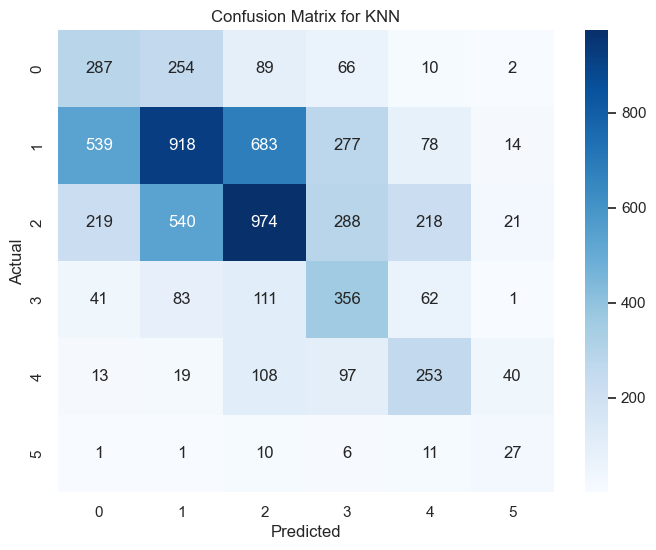

Performing grid search for DecisionTree...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0     0.9549    0.9576    0.9563       708
           1     0.9878    0.9697    0.9787      2509
           2     0.9801    0.9566    0.9682      2260
           3     0.9647    0.9618    0.9632       654
           4     0.8013    0.9283    0.8601       530
           5     0.7083    0.9107    0.7969        56

    accuracy                         0.9595      6717
   macro avg     0.8995    0.9475    0.9206      6717
weighted avg     0.9624    0.9595    0.9604      6717



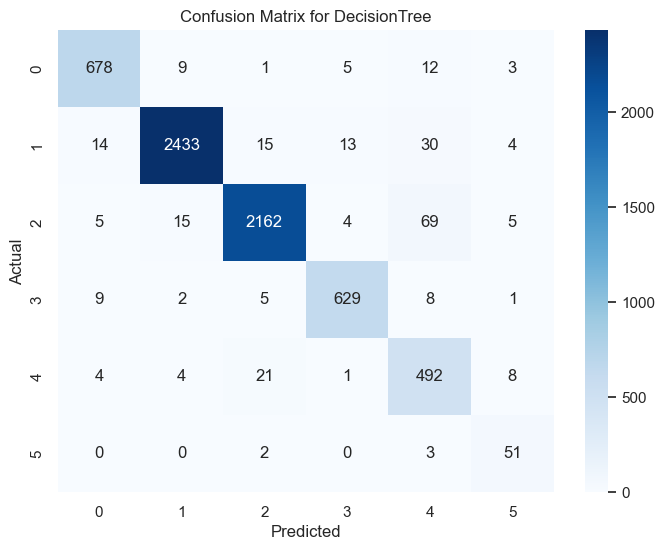

Performing grid search for NaiveBayes...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Classification Report for NaiveBayes:
              precision    recall  f1-score   support

           0     0.3441    0.7345    0.4687       708
           1     0.7712    0.4205    0.5442      2509
           2     0.7482    0.7664    0.7572      2260
           3     0.6607    0.7859    0.7179       654
           4     0.6272    0.8189    0.7103       530
           5     0.9057    0.8571    0.8807        56

    accuracy                         0.6406      6717
   macro avg     0.6762    0.7305    0.6798      6717
weighted avg     0.6974    0.6406    0.6407      6717



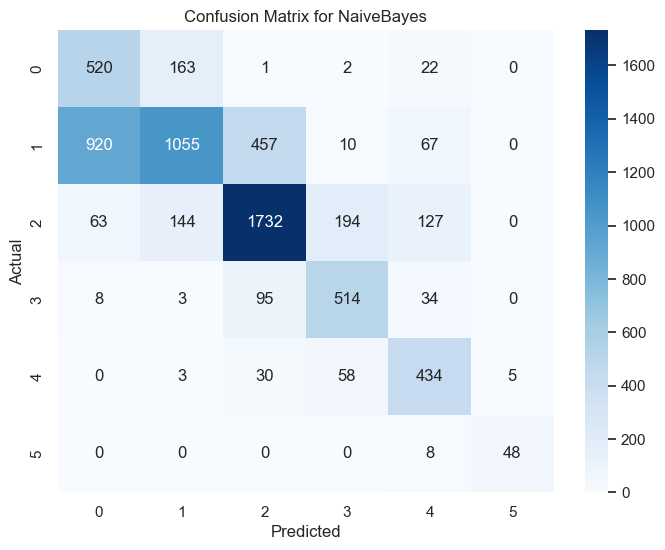

Performing grid search for LogisticRegression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\obasi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\obasi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0     0.8026    0.9421    0.8668       708
           1     0.7754    0.6688    0.7182      2509
           2     0.7114    0.5509    0.6209      2260
           3     0.4321    0.7829    0.5568       654
           4     0.5192    0.6623    0.5821       530
           5     0.4505    0.8929    0.5988        56

    accuracy                         0.6704      6717
   macro avg     0.6152    0.7500    0.6573      6717
weighted avg     0.7004    0.6704    0.6737      6717



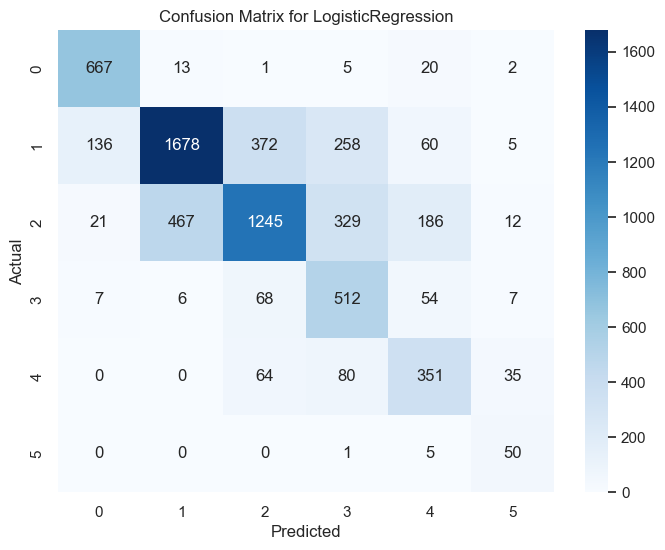

Performing grid search for KerasNN...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
210/210 [==============================] - 0s 2ms/step
Classification Report for KerasNN:
              precision    recall  f1-score   support

           0     0.9898    0.9548    0.9720       708
           1     0.9951    0.9701    0.9824      2509
           2     0.9899    0.9566    0.9730      2260
           3     0.9889    0.9572    0.9728       654
           4     0.8243    0.9208    0.8699       530
           5     0.2961    0.9464    0.4511        56

    accuracy                         0.9586      6717
   macro avg     0.8474    0.9510    0.8702      6717
weighted avg     0.9729    0.9586    0.9639      6717



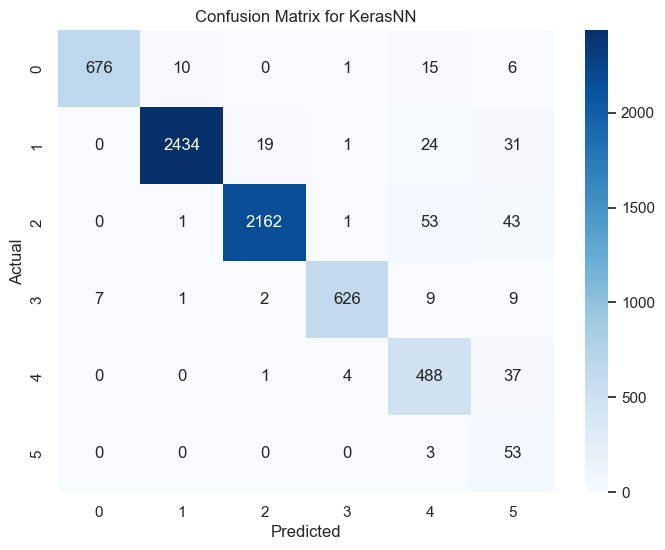

Best Hyperparameters for each model:
RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
KNN: {'n_neighbors': 5, 'weights': 'distance'}
DecisionTree: {'max_depth': 20, 'min_samples_split': 2}
NaiveBayes: {}
LogisticRegression: {'estimator__C': 10.0}
KerasNN: {'optimizer': 'rmsprop'}
Overall Results:
RandomForest - Test Accuracy: 0.9561
KNN - Test Accuracy: 0.4191
DecisionTree - Test Accuracy: 0.9595
NaiveBayes - Test Accuracy: 0.6406
LogisticRegression - Test Accuracy: 0.6704
KerasNN - Test Accuracy: 0.9586


In [25]:
target = 'CrashSevr'

label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])
y = df[target]
X = df.drop(target, axis=1)

# Set training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


def build_keras_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'LogisticRegression': OneVsRestClassifier(LogisticRegression(random_state=42)),
    'KerasNN': KerasClassifier(build_fn=build_keras_model, epochs=50, batch_size=256, verbose=0)
}


param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'NaiveBayes': {},
    'LogisticRegression': {
        'estimator__C': [0.1, 1.0, 10.0]
    },
    'KerasNN': {
        'optimizer': ['adam', 'sgd', 'rmsprop']

    }
}


best_models = {}
results = {}
classification_reports = {}
confusion_matrices = {}
best_params = {}


for model_name, model in models.items():
    print(f"Performing grid search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring=make_scorer(accuracy_score), n_jobs=-1, verbose=1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    best_params[model_name] = grid_search.best_params_
    
    
    y_pred = best_model.predict(X_test)

    
    if model_name == 'KerasNN':
        if y_pred.ndim > 1 and y_pred.shape[1] > 1:
            y_pred = np.argmax(y_pred, axis=1)
        else:
            y_pred = np.round(y_pred).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy}

    y_test_str = label_encoder.inverse_transform(y_test)
    y_pred_str = label_encoder.inverse_transform(y_pred)

    report = classification_report(y_test_str, y_pred_str, target_names=label_encoder.classes_.astype(str), digits=4)
    classification_reports[model_name] = report

    cm = confusion_matrix(y_test_str, y_pred_str)
    confusion_matrices[model_name] = cm

    print(f'Classification Report for {model_name}:')
    print(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

print("Best Hyperparameters for each model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

print("Overall Results:")
for name, result in results.items():
    print(f"{name} - Test Accuracy: {result['accuracy']:.4f}")
